My First Notebook

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv('2016_US_election_tweets.csv')

In [13]:
data.head(3)

,id,candidate_id,tweet_id,retweet_count,favorite_count,device,retweeted_status_id,lang,state,tweet_text,created_at,inserted_at,updated_at,tw_user_id,latitude,longitude
0,57486,3,770728672433143808,0,0,1,NaN,tr,NaN,"Ne farkınız var DAIŞ, El-Kaide, El Nusra, YPG ...",2016-08-30 21:03:29,2016-08-30 21:03:29,2016-08-30 21:03:29,NaN,NaN,NaN
1,57536,3,770729424207618048,0,0,1,NaN,en,NaN,@BarackObama the way you showed up in Louisian...,2016-08-30 21:06:28,2016-08-30 21:06:29,2016-08-30 21:06:29,NaN,NaN,NaN
2,57586,3,770730086978977796,0,0,1,NaN,en,NaN,White house not taking tax avoid seriously! Ap...,2016-08-30 21:09:06,2016-08-30 21:09:07,2016-08-30 21:09:07,NaN,NaN,NaN


In [14]:
# I only need the tweets and language columns. I will focus only in English language tweets.

data = data[['tweet_text', 'lang']]
data = data[data['lang'] == 'en']

In [15]:
# Making sure there is no null values

data = data.dropna()
data.isnull().sum()

tweet_text    0
lang          0
dtype: int64

In [16]:
# First, I clean and prepare data for sentiment analysis

stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

def clean(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '',tweet)
    tweet = re.sub('<.*?>+', '',tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('\w*\d\w*', '',tweet)
    tweet = tweet.split(' ')
    tweet = [word for word in tweet if word not in stopword]
    tweet = ' '.join(tweet)
    tweet = tweet.split(' ')
    tweet = [stemmer.stem(word) for word in tweet]
    tweet = ' '.join(tweet)
    return tweet

data['tweet_text'] = data['tweet_text'].apply(lambda x: clean(x))

In [17]:
data.head()

,tweet_text,lang
1,barackobama way show louisiana,en
2,white hous take tax avoid serious appl disgust...,en
3,politico realdonaldtrump hillaryclinton pledg ...,en
4,shes due day,en
5,eight jamaican select potus barackobama young ...,en


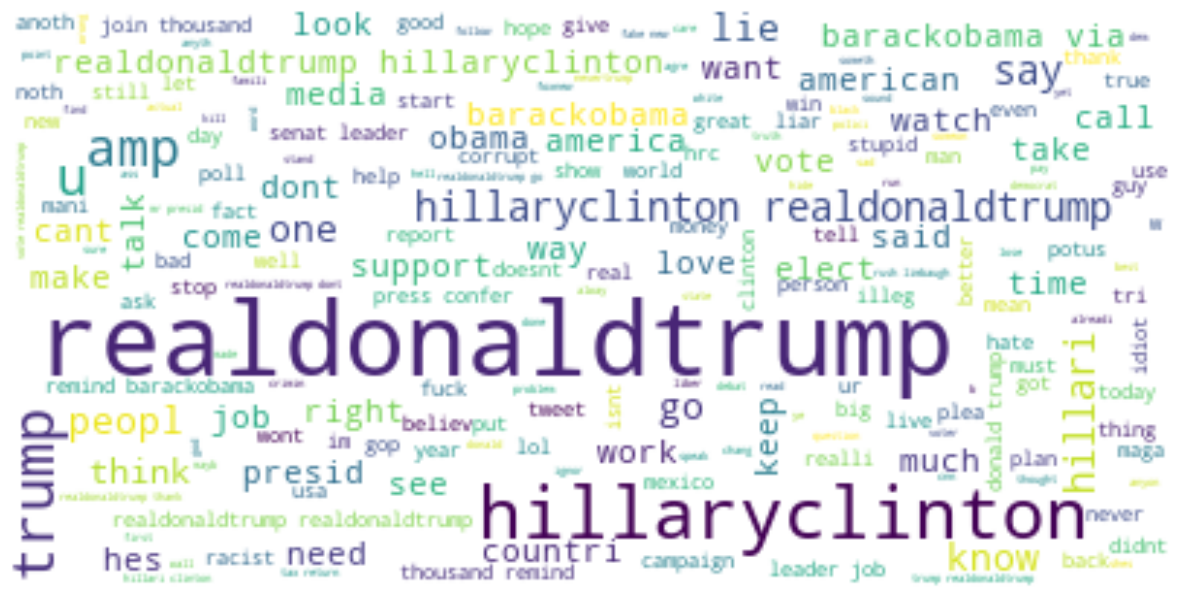

In [18]:
# Here, I visualize the most frequently used words regardless of their polarity

all_tweets = ' '.join(i for i in data.tweet_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(all_tweets)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [19]:
# Now, I catagorize tweets' polarity

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['tweet_text']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['tweet_text']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['tweet_text']]

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


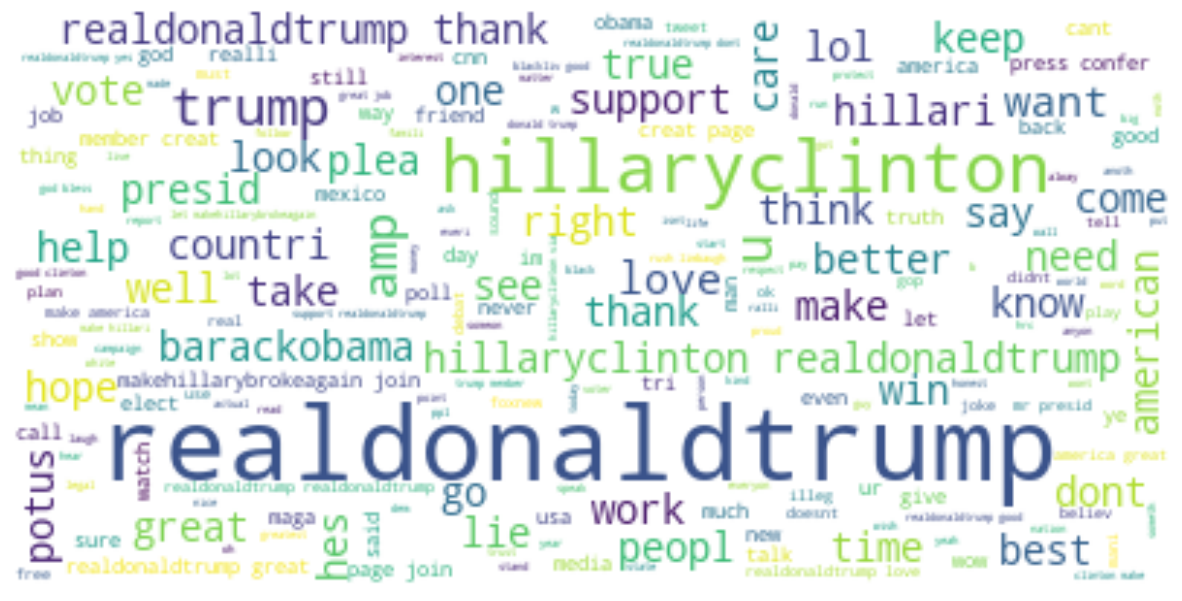

In [20]:
# Visualizing words that convey a positive sentiment

positive = ' '.join([i for i in data['tweet_text'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(positive)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

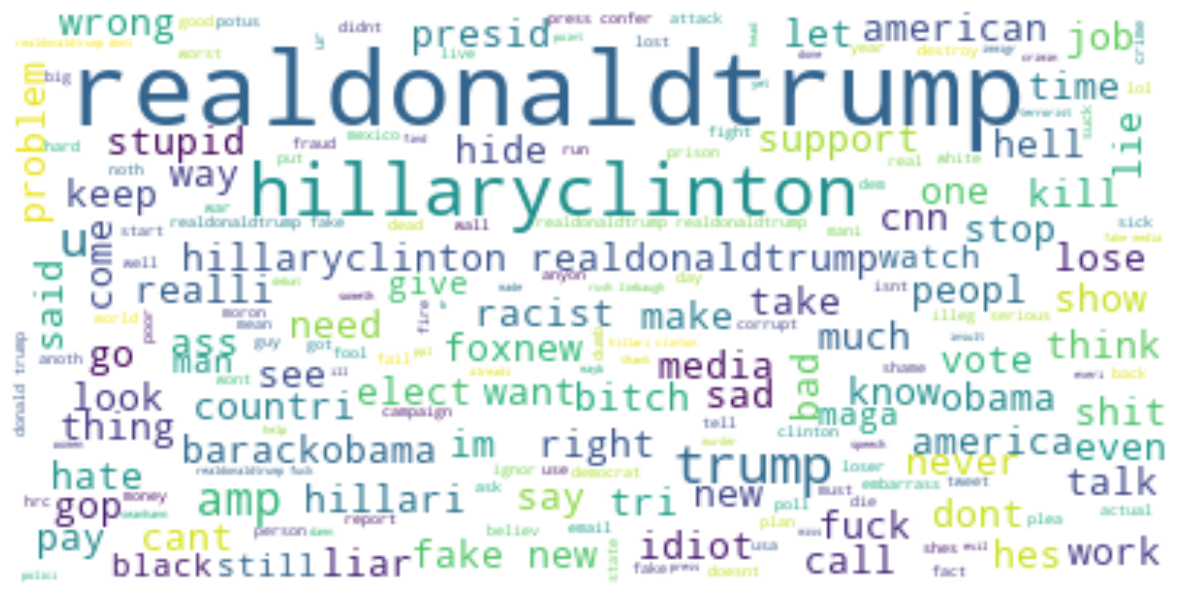

In [21]:
# Finally, visualizing words with negative connotation


negative = ' '.join([i for i in data['tweet_text'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(negative)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()